In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from lib import *
from svm import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# visualize data
# e.g. visualize(train_data[1266, :], train_lable[1266])
def visualize(data, lable = None):
    data_x = data[::2]
    data_y = data[1::2]
    plt.plot(data_x, data_y)
    if lable != None:
        print "Number is : ", lable

In [23]:
woo

train data:  (3000L, 16L)
train lable:  (3000L,)


In [19]:
train_lable[train_lable <= 4 ] = -1
train_lable[train_lable > 4] = 1
validation_lable[validation_lable <= 4 ] = -1
validation_lable[validation_lable > 4] = 1

In [21]:
alpha, b = SMO(2, 1e-5,  train_data, train_lable, max_passes = 3, 
               kernel=kernel_polynomial, max_iter =3, validation_data = validation_data, validation_lable = validation_lable )


now ir = 1; Train Correct = 0.48633333333333334; 
validation Correct = 0.4839142091152815; 
now ir = 2; Train Correct = 0.773; 
validation Correct = 0.792225201072386; 
now ir = 3; Train Correct = 0.9193333333333333; 
validation Correct = 0.9276139410187667; 


In [45]:
train_lable_num, alpha_num, b_num = train_0va(train_data, train_lable, max_passes=10, kernel=kernel_polynomial, max_iter=10,
                                             validation_data = validation_data, validation_lable = validation_lable )

Now doing number: 0, there is 310 of them
now ir = 1; Train Correct = 0.10333333333333333; 
validation Correct = 0.09785522788203753; 
now ir = 2; Train Correct = 0.4; 
validation Correct = 0.4316353887399464; 
now ir = 3; Train Correct = 0.49333333333333335; 
validation Correct = 0.5201072386058981; 
now ir = 4; Train Correct = 0.5116666666666667; 
validation Correct = 0.5335120643431636; 
now ir = 5; Train Correct = 0.4776666666666667; 
validation Correct = 0.4973190348525469; 
now ir = 6; Train Correct = 0.607; 
validation Correct = 0.599195710455764; 
now ir = 7; Train Correct = 0.693; 
validation Correct = 0.6823056300268097; 
now ir = 8; Train Correct = 0.6863333333333334; 
validation Correct = 0.6729222520107239; 
now ir = 9; Train Correct = 0.6966666666666667; 
validation Correct = 0.6916890080428955; 
now ir = 10; Train Correct = 0.6846666666666666; 
validation Correct = 0.6836461126005362; 
Now doing number: 1, there is 315 of them
now ir = 1; Train Correct = 0.105; 
validati

Number is :  2.0
predict:  2


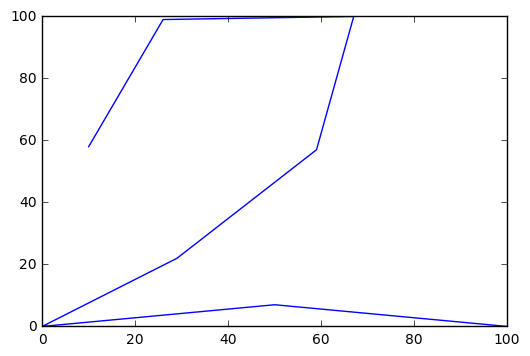

In [51]:
# example visual test
num = 48
visualize(validation_data[num,:],validation_lable[num] )
number = number_predict(validation_data[num,:], train_data, train_lable_num, alpha_num, b_num, kernel_polynomial)
print "predict: ", number


In [52]:
# final result
validation_correct_rate(validation_data, validation_lable, train_data, train_lable_num, alpha_num, b_num, kernel_polynomial)

0.9075067024128687

In [183]:
# using lib svm main
clf = svm.SVC()
clf.fit(train_data, train_lable)
trainErr = []
validationErr = []
for i in range (1):
    # svm main
    ir = 5 * i 
    print "iter: ", ir
    clf = svm.SVC(max_iter=100)
    clf.fit(train_data, train_lable)
    terror = test(train_data, train_lable, clf)
    print "test correcr rate: ",terror
    trainErr.append(terror)
    verror = test(validation_data, validation_lable, clf)
    print "validation correcr rate: ",verror
    validationErr.append(verror)
#plt.plot(trainErr)
#plt.plot(validationErr)
sample = train_data[1200,:]
visualize(sample)
sample= sample.reshape(1, -1)
print sample.shape
print clf.predict(sample)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)